### Group Project - Kaggle Game Data

We found this dataset in Kaggle to address below question so that it can help us to related our Consumer Analytics project with below question.

The data is based on Video game sales from Vgchartz and corresponding ratings from Metacritic containing data on ~6,900 videgames sales, age ratings, critic and user ratings, genre and others. 

As per description, in the dataset, the below is cointained.

- Name: Name of the game
- Platform: Console on which the game is running
- Year_of_Release: Year of the game released
- Genre: Game's category
- Publisher: Game's Publisher
- NA_Sales: Game sales in North America (in millions of units)
- EU_Sales: Game sales in the European Union (in millions of units)
- JP_Sales: Game sales in Japan (in millions of units)
- Other_Sales: Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the - E.U. and South America (in millions of units)
- Global_Sales: Total sales in the world (in millions of units)
- Critic_Score: Aggregate score compiled by Metacritic staff
- Critic_Count: The number of critics used in coming up with the Critic_score
- User_Score: Score by Metacritic's subscribers
- User_Count: Number of users who gave the user_score
- Developer: Party responsible for creating the game
- Rating: The ESRB ratings (E.g. Everyone, Teen, Adults Only, .etc)

The following question are addressed:
1. Whats the most popular games,geners of the Year from 1980 to 2016?
2. What are the top 10 game in different regions(EU, JP vs Global sales)?
3. What are the trends in videogames genres from 1985 to 2016?
4. What are the top 10 gaming console from the 1980 to 2016? 
5. Who are the top publishers for games? (maybe amazon can do a crossover with them)
6.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap

In [14]:
#display a sample random 10 row or column.
games=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
15257,Super Nazo Puyo Tsuu: Ruruu no Tetsuwan Hanjyouki,SNES,1996.0,Puzzle,Compile,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
7806,Need for Speed: The Run,3DS,2011.0,Action,Electronic Arts,0.09,0.09,0.00,0.02,0.19,65.0,9.0,6,26.0,Firebrand Games,E10+
61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,5.95,3.11,0.00,1.06,10.12,74.0,15.0,7.8,16.0,Ubisoft,E10+
2756,Dark Souls II,X360,2014.0,Role-Playing,Namco Bandai Games,0.48,0.18,0.01,0.07,0.74,91.0,30.0,7.9,915.0,From Software,T
11957,R-Type Command,PSP,2007.0,Strategy,Rising Star Games,0.05,0.00,0.01,0.01,0.07,69.0,29.0,6.5,6.0,Irem,E10+
2947,MotionSports,X360,2010.0,Sports,Ubisoft,0.38,0.25,0.00,0.06,0.69,40.0,30.0,4.4,9.0,Ubisoft Milan,T
10662,Ghost in the Shell,PS,1997.0,Simulation,Sony Computer Entertainment,0.06,0.04,0.00,0.01,0.10,NaN,NaN,NaN,NaN,NaN,NaN
10855,Kung Fu Panda 2,PS3,2011.0,Action,THQ,0.04,0.04,0.00,0.01,0.09,NaN,NaN,NaN,NaN,NaN,NaN
7156,Risen 2: Dark Waters,PC,2012.0,Role-Playing,Deep Silver,0.00,0.19,0.00,0.03,0.22,69.0,51.0,5.6,751.0,Piranha Bytes,M
3166,NHL 13,PS3,2012.0,Sports,Electronic Arts,0.33,0.21,0.00,0.09,0.64,84.0,22.0,6.8,60.0,Electronic Arts,E10+


In [12]:
#number of rows for the games
len(games)

16719

In [5]:
#to determine if there is any empty value in each variables
for column in games:
    if games[column].isnull().any():
       print('{0} has {1} null values'.format(column, games[column].isnull().sum()))

Name has 2 null values
Year_of_Release has 269 null values
Genre has 2 null values
Publisher has 54 null values
Critic_Score has 8582 null values
Critic_Count has 8582 null values
User_Score has 6704 null values
User_Count has 9129 null values
Developer has 6623 null values
Rating has 6769 null values


In [21]:
df_games_clean=games.copy()

In [22]:
#create copy of the data by dropping all the NA values. but still debating. 
df_games_clean=df_games_clean.dropna()

In [23]:
df_games_clean

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### Number of games on each platform

As we can see Nintendo DS and PS2 have most number of games followed by Wii,PS3, PS and PSP.

Text(0, 0.5, 'Number of games')

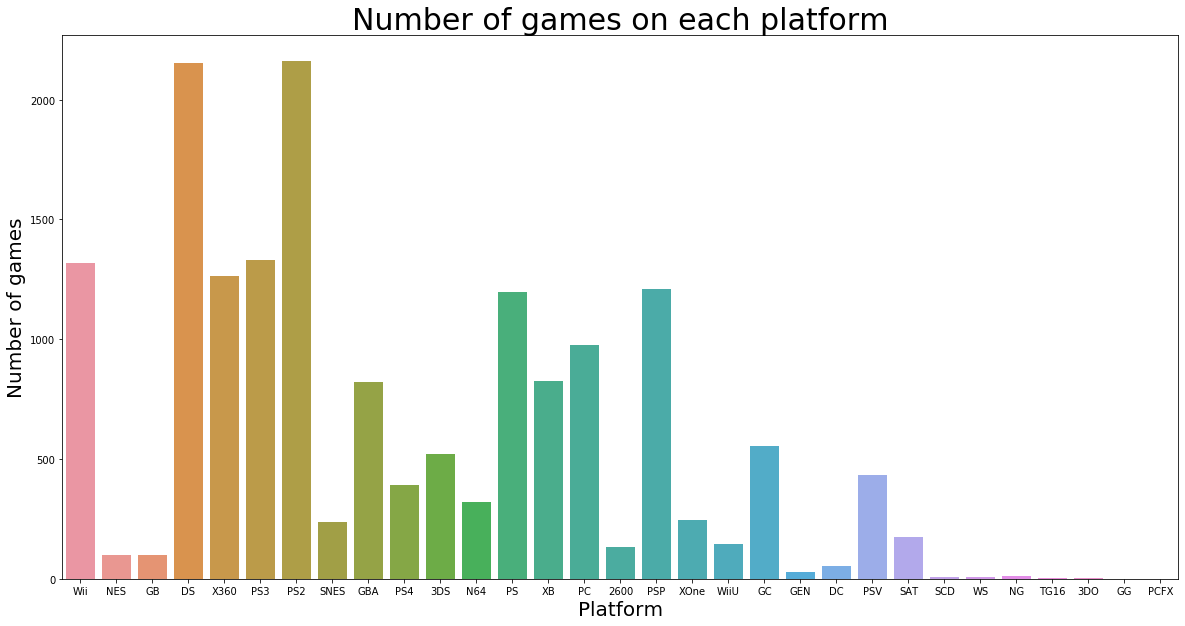

In [24]:
#number of games on each platform
plt.figure(figsize=(20,10))
sns.countplot(games['Platform'])
plt.title('Number of games on each platform',fontdict={'fontsize':30})
plt.xlabel('Platform',fontdict={'fontsize':20})
plt.ylabel('Number of games',fontdict={'fontsize':20})

Text(0, 0.5, 'Number of games')

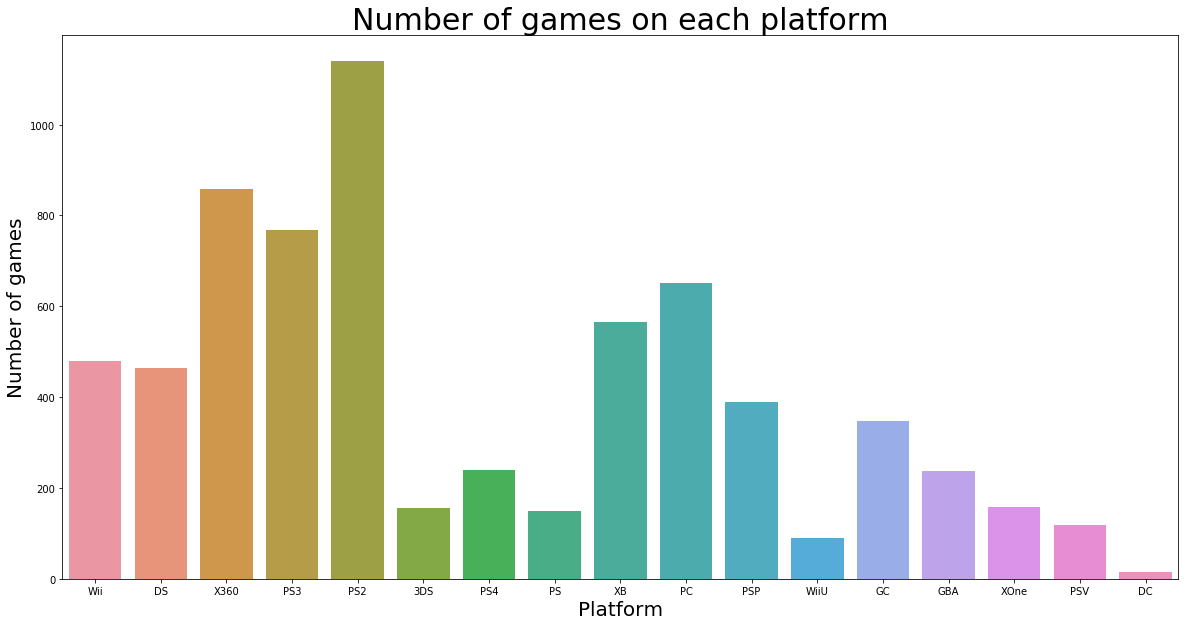

In [25]:
#this chart is for the data that drop the NAs. it seems like we still will get the similiar information from the chart. PS2 still takes the lead.
plt.figure(figsize=(20,10))
sns.countplot(df_games_clean['Platform'])
plt.title('Number of games on each platform',fontdict={'fontsize':30})
plt.xlabel('Platform',fontdict={'fontsize':20})
plt.ylabel('Number of games',fontdict={'fontsize':20})

Text(0, 0.5, 'Counts of Genre')

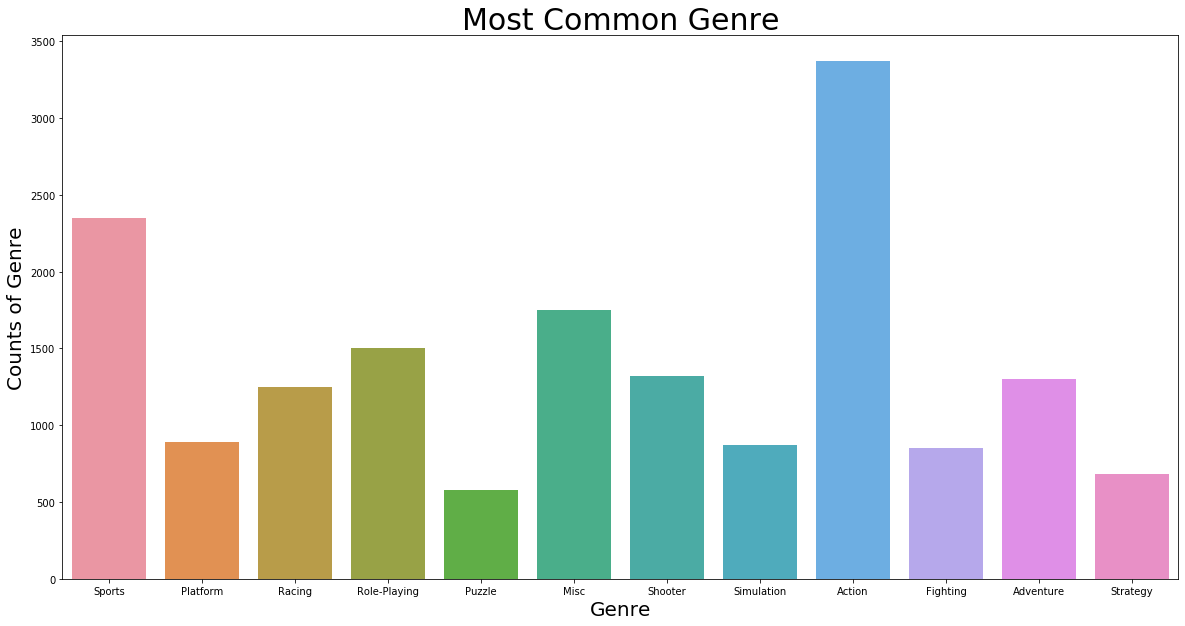

In [46]:
#whats the most common genre? Per graph, Action is the most popular one.

lables=games['Genre'].value_counts()
lables

plt.figure(figsize=(20,10))
sns.countplot(games['Genre'])
plt.title('Most Common Genre',fontdict={'fontsize':30})
plt.xlabel('Genre',fontdict={'fontsize':20})
plt.ylabel('Counts of Genre',fontdict={'fontsize':20})
